<a href="https://colab.research.google.com/github/HarveCriqui/Colab/blob/main/Linear_Regression_and_Predictive_Modeling_Harve_Criqui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final Project

* Name: Harve Criqui
* Email: criqhe23@wfu.edu
* Date: 8/20/2023

# Section 1: Exploring the csv
We are looking to get an idea of what each of the tables looks like and clean up any missing data

1. Import
```
import pandas as pd
```
2. Start by reading in each file
```
df = pd.read_csv('filepath/filename.csv')
```



In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
bost = pd.read_csv('/content/drive/MyDrive/Sample Datasets/boston-1.csv')
pred1 = pd.read_csv('/content/drive/MyDrive/Sample Datasets/model1_predictions-1.csv')
pred2 = pd.read_csv('/content/drive/MyDrive/Sample Datasets/model2_predictions-1.csv')
zips = pd.read_csv('/content/drive/MyDrive/Sample Datasets/zips.csv')

In [ ]:
print(bost.info())
bost.head()
# Note: yr_remod has approx 500 null values(consider removing rows)
# Note: land_sf has 4 null values(consider removing rows)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14225 entries, 0 to 14224
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              14225 non-null  int64  
 1   zipcode          14225 non-null  int64  
 2   own_occ          14225 non-null  object 
 3   land_sf          14221 non-null  float64
 4   yr_built         14225 non-null  int64  
 5   yr_remod         13714 non-null  float64
 6   living_area      14225 non-null  int64  
 7   num_floors       14225 non-null  float64
 8   structure_class  14225 non-null  object 
 9   r_bldg_styl      14225 non-null  object 
 10  r_roof_typ       14225 non-null  object 
 11  r_ext_fin        14225 non-null  object 
 12  r_total_rms      14225 non-null  int64  
 13  r_bdrms          14225 non-null  int64  
 14  r_full_bth       14225 non-null  int64  
 15  r_half_bth       14225 non-null  int64  
 16  r_bth_style      14225 non-null  object 
 17  r_kitch     

,pid,zipcode,own_occ,land_sf,yr_built,yr_remod,living_area,num_floors,structure_class,r_bldg_styl,...,r_ovrall_cnd,r_int_cnd,r_int_fin,r_view,zip,population,pop_density,median_income,city_state,av_total
0,10,2136,Y,10288.0,1992,0.0,1681,1.0,R,RR,...,A,A,N,A,2136,28488,6207,58890,"Hyde Park, MA",321200.0000
1,20,2132,Y,10148.0,1900,2016.0,3024,2.5,R,CL,...,G,G,N,G,2132,36314,13251,75446,"Cambridge, MA",845475.9346
2,30,2132,Y,8512.0,1920,0.0,1160,2.0,R,CL,...,A,A,N,A,2132,36314,13251,75446,"Cambridge, MA",401230.0313
3,40,2124,Y,3187.0,1900,2001.0,1868,2.0,R,CL,...,G,A,N,F,2124,47783,15913,48841,"Dorchester Center, MA",450500.0000
4,50,2136,Y,10088.0,1971,1975.0,1534,1.0,R,RR,...,A,A,N,G,2136,28488,6207,58890,"Hyde Park, MA",368094.7401


In [ ]:
# Fix DataTypes for yr_remod
bost['yr_remod'] = bost['yr_remod'].astype('Int64')

In [ ]:
print(pred1.info())
pred1.head()
# Note: 4 null values in pred(consider dropping)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14225 entries, 0 to 14224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pid     14225 non-null  int64  
 1   pred    14221 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 222.4 KB
None


,pid,pred
0,10,492976.273874
1,20,696277.057878
2,30,393368.854806
3,40,458700.834601
4,50,467320.997700


In [ ]:
print(pred2.info())
pred2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14225 entries, 0 to 14224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pid     14225 non-null  int64  
 1   pred    14225 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 222.4 KB
None


,pid,pred
0,10,318559.3750
1,20,828821.6250
2,30,411252.3125
3,40,432201.1875
4,50,366862.2500


In [ ]:
print(zips.info())
zips.head()
# Note: 6 entries, for joins do it on='right'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ZIP            6 non-null      int64 
 1   Population     6 non-null      int64 
 2   Pop_Density    6 non-null      int64 
 3   Median_Income  6 non-null      int64 
 4   City_State     6 non-null      object
dtypes: int64(4), object(1)
memory usage: 368.0+ bytes
None


,ZIP,Population,Pop_Density,Median_Income,City_State
0,2132,36314,13251,75446,"Cambridge, MA"
1,2124,47783,15913,48841,"Dorchester Center, MA"
2,2131,29826,11505,66735,"Roslindale, MA"
3,2136,28488,6207,58890,"Hyde Park, MA"
4,2130,35401,10618,75730,"Jamaica Plain, MA"


# Section 2: Cleaning datasets

In [ ]:
# Fill Null Values
bost['yr_remod'] = bost['yr_remod'].fillna(0)
bost = bost[bost['yr_built'] > 1500]
# Drop Null Values
pred1 = pred1.dropna()
bost = bost.dropna()
pred1.info()
bost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14221 entries, 0 to 14224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pid     14221 non-null  int64  
 1   pred    14221 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 333.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14220 entries, 0 to 14224
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              14220 non-null  int64  
 1   zipcode          14220 non-null  int64  
 2   own_occ          14220 non-null  object 
 3   land_sf          14220 non-null  float64
 4   yr_built         14220 non-null  int64  
 5   yr_remod         14220 non-null  Int64  
 6   living_area      14220 non-null  int64  
 7   num_floors       14220 non-null  float64
 8   structure_class  14220 non-null  object 
 9   r_bldg_styl      14220 non-null  object 
 10  r_roof_typ       14220 non

# Section 3: Combining Datasets and Plotting Residuals
>Model 1. Histogram of Residuals: There appears to be a normal distribution of residuals but there might be a slight skew on the left side of the graph due to outliers. Residuals vs Predicted: The biggest range seems to be focused around the .5 prediction(500,000) and the range of error goes down as we get further from that mark. Residuals overtime: The is no pattern. QQ Plot of Residuals: points stay relatively on the line but start to deviate at the tails.

>Model 2. Histogram of Residuals: There appears to be a normal distribution of residuals. Residuals vs Predicted: The range seems to be evenly distributed and implies homoscedasticity. Residuals overtime: The is no pattern. QQ Plot of Residuals: points stay relatively on the line but start to deviate at the tails.

In [ ]:
boston_prep1 = bost.merge(pred1,on='pid',how='inner')
boston_prep1 = boston_prep1.drop('zip', axis=1)
boston_prep1['residual_error'] = boston_prep1['av_total'] - boston_prep1['pred']


boston_prep2 = bost.merge(pred2,on='pid',how='inner')
boston_prep2 = boston_prep2.drop('zip', axis=1)
boston_prep2['residual_error'] = boston_prep2['av_total'] - boston_prep2['pred']

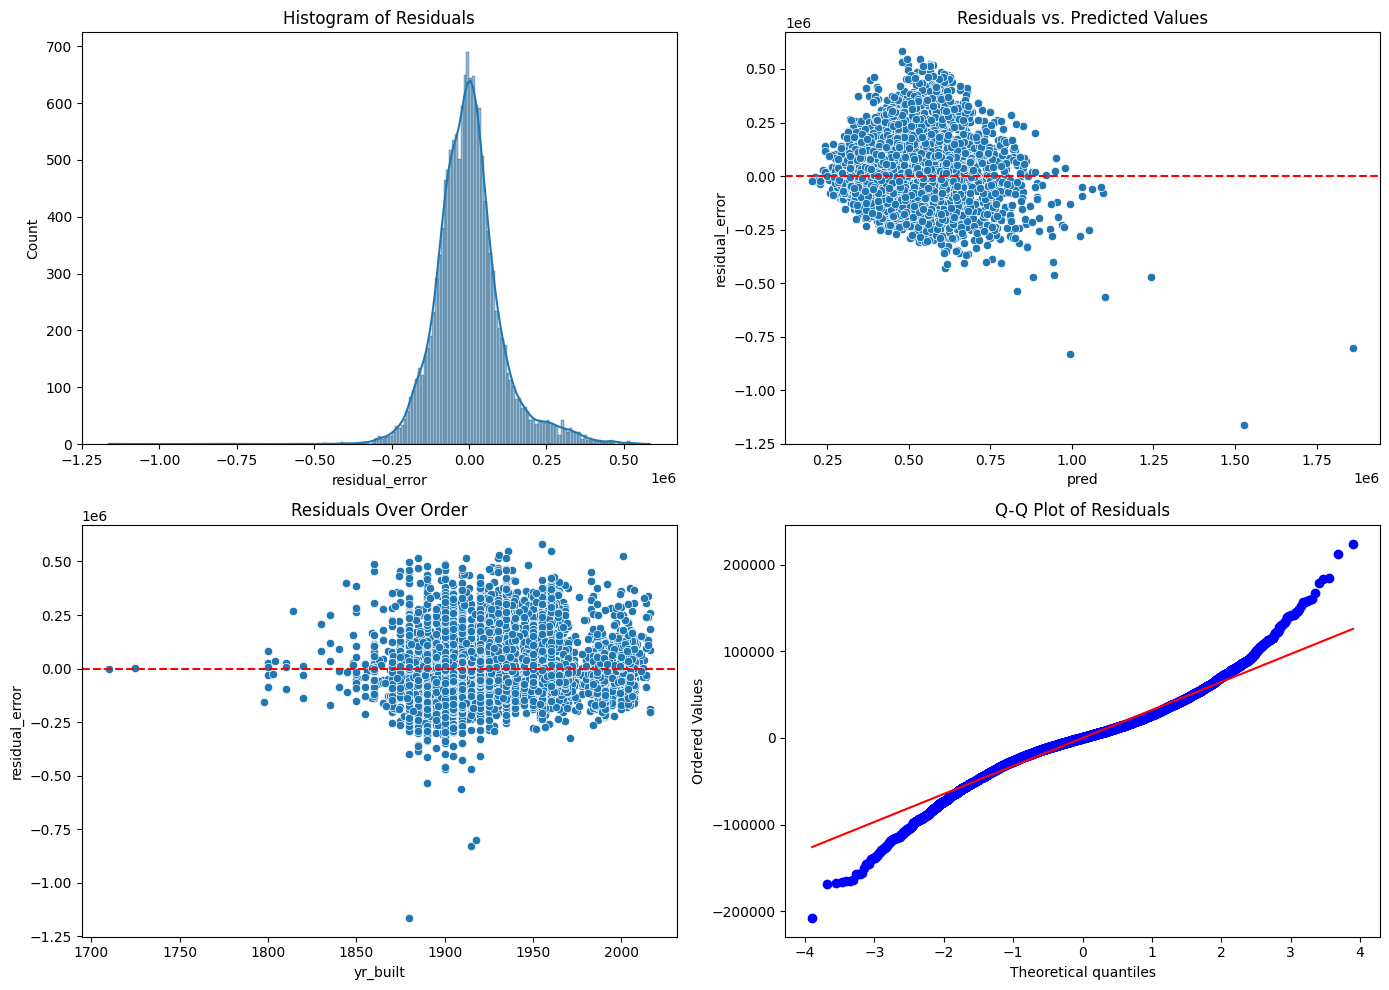

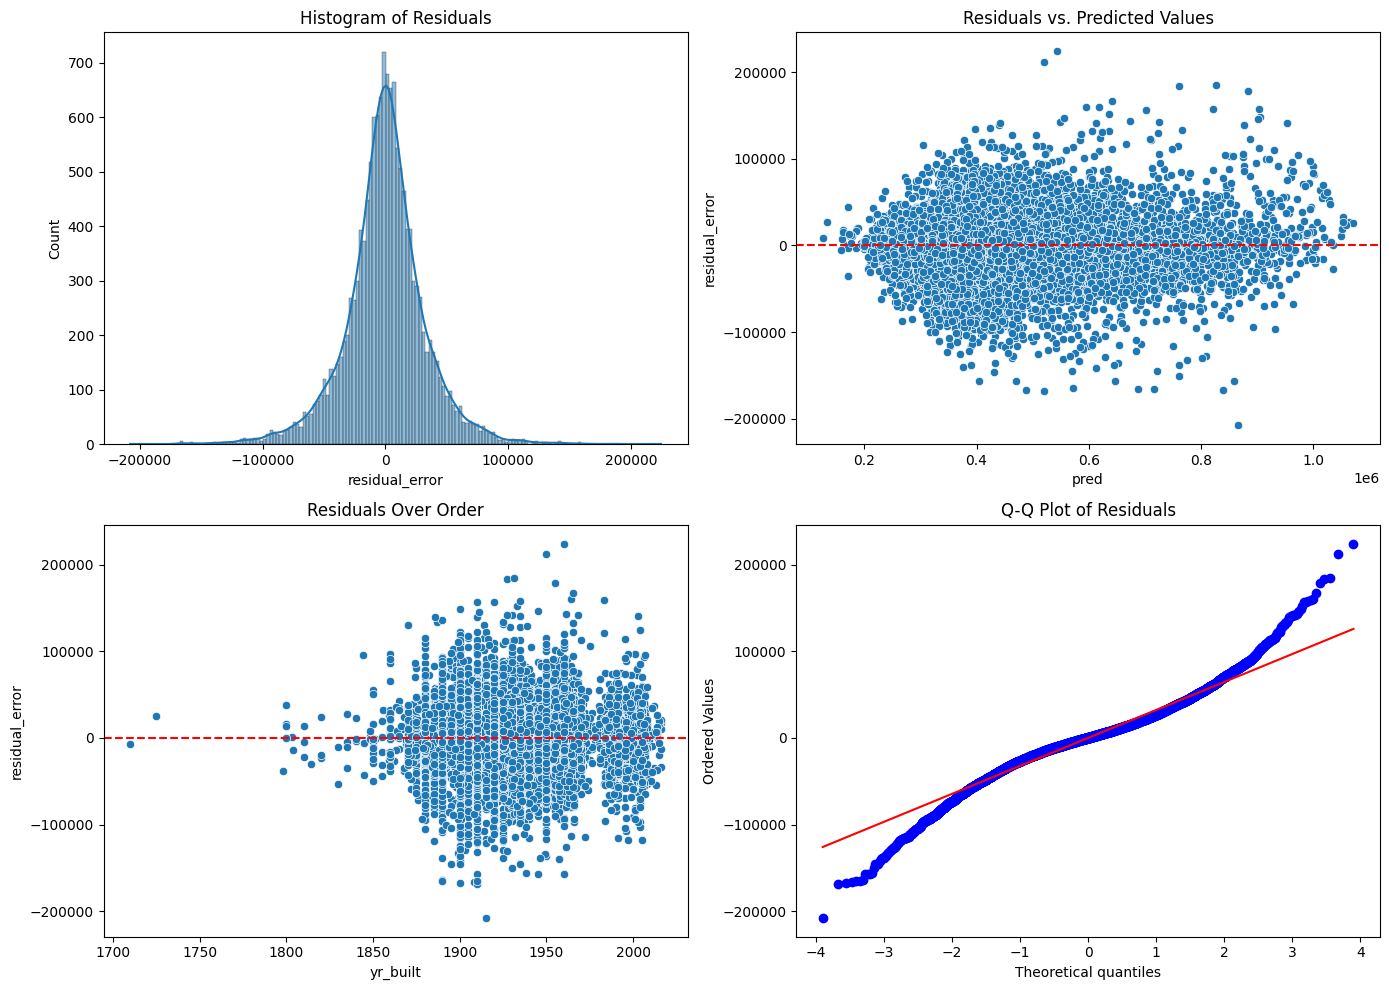

In [ ]:
import scipy.stats as stats

# Set up a 2x2 grid for plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot histogram of residuals
sb.histplot(boston_prep1['residual_error'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Residuals')

# Scatter plot of predicted values vs. residuals
sb.scatterplot(data=boston_prep1, x='pred', y='residual_error', ax=axes[0, 1])
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_title('Residuals vs. Predicted Values')

# Plot residuals over order (using index as a proxy for order)
sb.scatterplot(data=boston_prep1, x='yr_built', y='residual_error', ax=axes[1, 0])
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_title('Residuals Over Order')


# Q-Q plot of residuals
stats.probplot(boston_prep2['residual_error'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Residuals')

# Adjust layout
plt.tight_layout()
plt.show()



# Set up a 2x2 grid for plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot histogram of residuals
sb.histplot(boston_prep2['residual_error'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Residuals')

# Scatter plot of predicted values vs. residuals
sb.scatterplot(data=boston_prep2, x='pred', y='residual_error', ax=axes[0, 1])
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_title('Residuals vs. Predicted Values')

# Plot residuals over order (using index as a proxy for order)
sb.scatterplot(data=boston_prep2, x='yr_built', y='residual_error', ax=axes[1, 0])
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_title('Residuals Over Order')


# Q-Q plot of residuals
stats.probplot(boston_prep2['residual_error'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Residuals')

# Adjust layout
plt.tight_layout()
plt.show()



#Section 4: Correlational Analysis


> Prediction 1: In prediction 1 The biggest correlation was living area at .97 followed by total rooms. In the actual av_totals it was living area at .64 followed by median income at .43. Prediction 1 had its correlation for median income at .004(practically non-existent)

> Predicion 2: Prediction 2 has a much higher correlation between prediction and av_total than prediction 1. (.97) More intestingly its correlations almost mirror av_total's correlations with only minor discrepencies of aproximately .1 on average.


<ipython-input-12-72bf7b26b5c4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_1 = boston_prep1.corr()


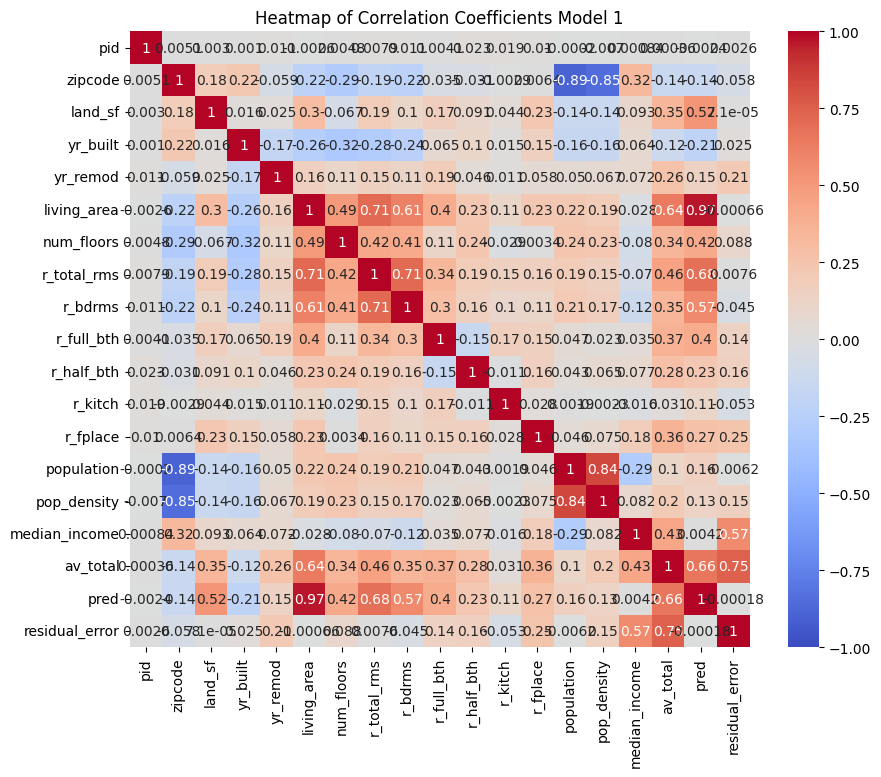

<ipython-input-12-72bf7b26b5c4>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_2 = boston_prep2.corr()


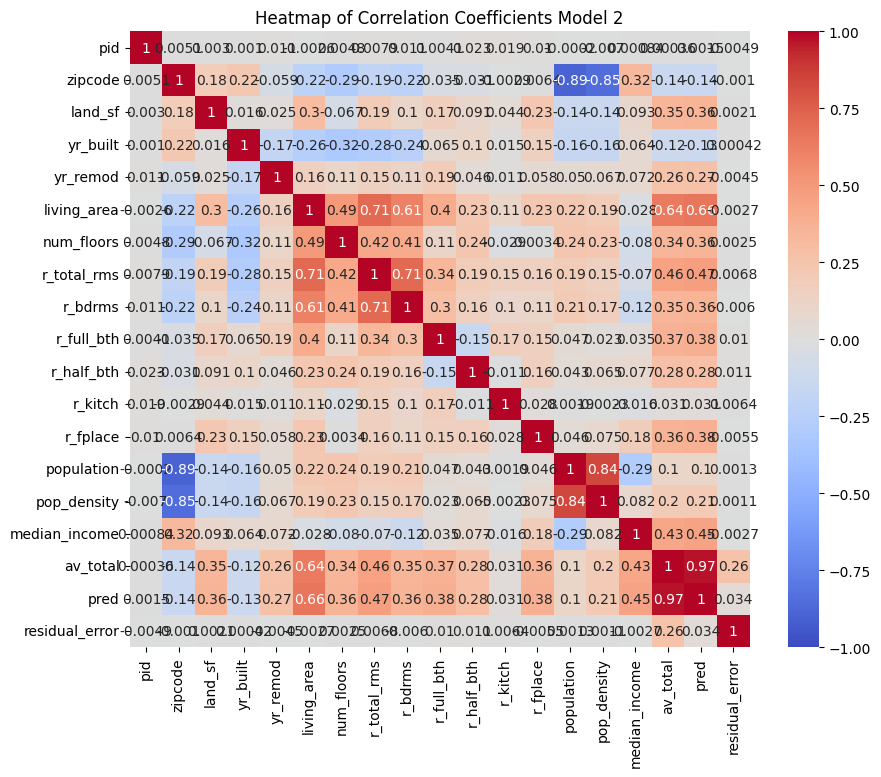

In [ ]:
# Calculating the correlation matrix
correlation_matrix_1 = boston_prep1.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Coefficients Model 1')
plt.show()

# Calculating the correlation matrix
correlation_matrix_2 = boston_prep2.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Coefficients Model 2')
plt.show()

#Section 5: Numeric Analysis
>4 graphs containing the predicted values versus living area, predicted values versus actual values, and the living area versus predicted values of Model 1. It also shows the predicted values versus actual values of Model 2 for contrast. Interestingly the graphs for actual values vs living area and predicted vs actual values for Model 1 look strikingly similar and this is likely due to the fact that Model 1 has a massive correlation for predicted values and living area leading to them having similar scatter plots when compared to the actual values.

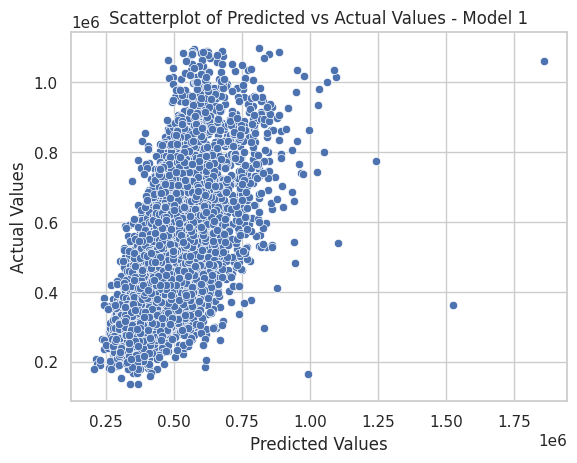

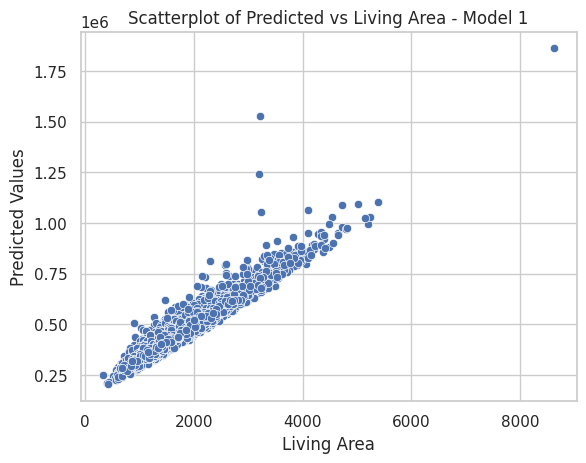

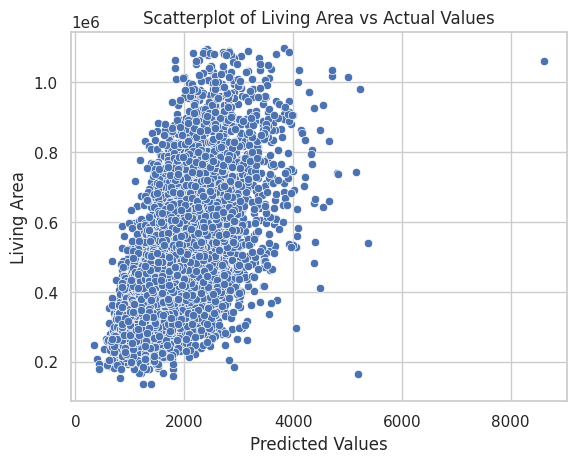

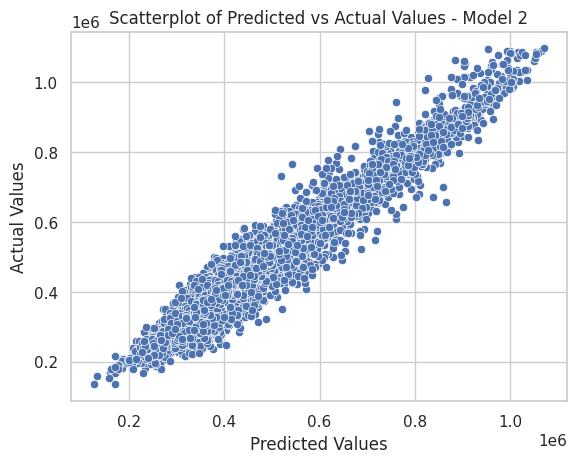

In [ ]:
# Create Scatterplots and barplots
sb.set(style="whitegrid")
sb.scatterplot(x="pred", y="av_total", data=boston_prep1)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Scatterplot of Predicted vs Actual Values - Model 1")

plt.show()

# Create Scatterplots and barplots
sb.set(style="whitegrid")
sb.scatterplot(x="living_area", y="pred", data=boston_prep1)
plt.xlabel("Living Area")
plt.ylabel("Predicted Values")
plt.title("Scatterplot of Predicted vs Living Area - Model 1")

plt.show()

sb.set(style="whitegrid")
sb.scatterplot(x="living_area", y="av_total", data=boston_prep1)
plt.xlabel("Predicted Values")
plt.ylabel("Living Area")
plt.title("Scatterplot of Living Area vs Actual Values")

plt.show()

# Create Scatterplots and barplots
sb.set(style="whitegrid")
sb.scatterplot(x="pred", y="av_total", data=boston_prep2)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Scatterplot of Predicted vs Actual Values - Model 2")
plt.show()

#Section 6: Categorical Analysis

In [ ]:
# Get the list of numeric columns
numeric_columns = boston_prep1.select_dtypes(include=[np.number]).columns
numeric_columns
categories1 = boston_prep1.drop(numeric_columns, axis=1)
categories2 = boston_prep2.drop(numeric_columns, axis=1)
print(categories1.columns)
categories1
# Important columns = own_occ, r_ac, r_ext_cnd, r_ovrall_cnd, r_int_cnd, r_view

Index(['own_occ', 'structure_class', 'r_bldg_styl', 'r_roof_typ', 'r_ext_fin',
       'r_bth_style', 'r_kitch_style', 'r_heat_typ', 'r_ac', 'r_ext_cnd',
       'r_ovrall_cnd', 'r_int_cnd', 'r_int_fin', 'r_view', 'city_state'],
      dtype='object')


,own_occ,structure_class,r_bldg_styl,r_roof_typ,r_ext_fin,r_bth_style,r_kitch_style,r_heat_typ,r_ac,r_ext_cnd,r_ovrall_cnd,r_int_cnd,r_int_fin,r_view,city_state
0,Y,R,RR,G,M,S,S,W,N,A,A,A,N,A,"Hyde Park, MA"
1,Y,R,CL,H,F,M,M,F,N,G,G,G,N,G,"Cambridge, MA"
2,Y,R,CL,G,M,S,S,W,N,A,A,A,N,A,"Cambridge, MA"
3,Y,R,CL,M,W,M,M,W,N,G,G,A,N,F,"Dorchester Center, MA"
4,Y,R,RR,G,W,S,S,E,N,A,A,A,N,G,"Hyde Park, MA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14215,Y,R,CL,H,M,S,S,W,N,A,A,A,N,A,"Dorchester Center, MA"
14216,Y,R,CL,H,W,M,S,W,N,A,A,G,N,A,"Cambridge, MA"
14217,Y,R,CL,G,W,S,S,W,N,A,A,G,N,A,"Cambridge, MA"
14218,Y,R,CL,H,A,S,S,W,N,A,A,A,N,A,"Dorchester Center, MA"


#Section 7: Categorical to Numeric Analysis
>This is a set of graphs containing categorical data vs average home value. The most intersting graphs let us know that homes with an excellent condition and excellent view are generally worth more than homes with less than excellent ratings in those categories.

<ipython-input-15-c7f12741839a>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = boston_prep1.groupby(row).mean()


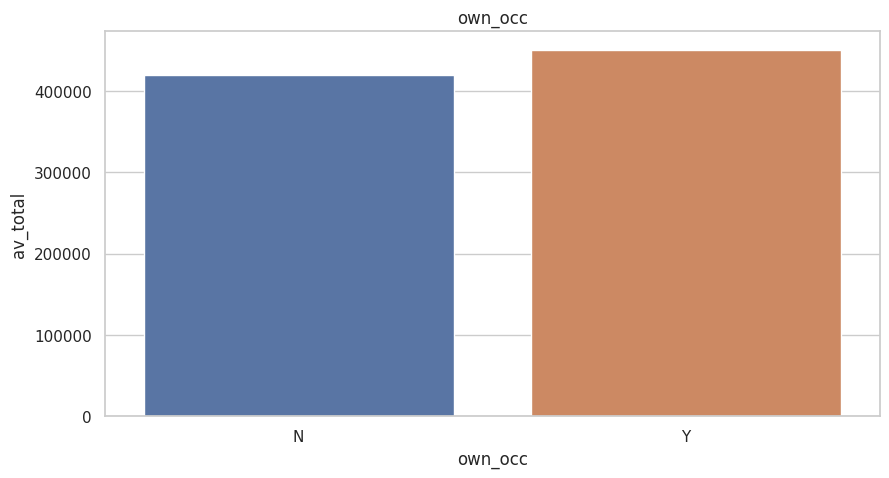

<ipython-input-15-c7f12741839a>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = boston_prep1.groupby(row).mean()


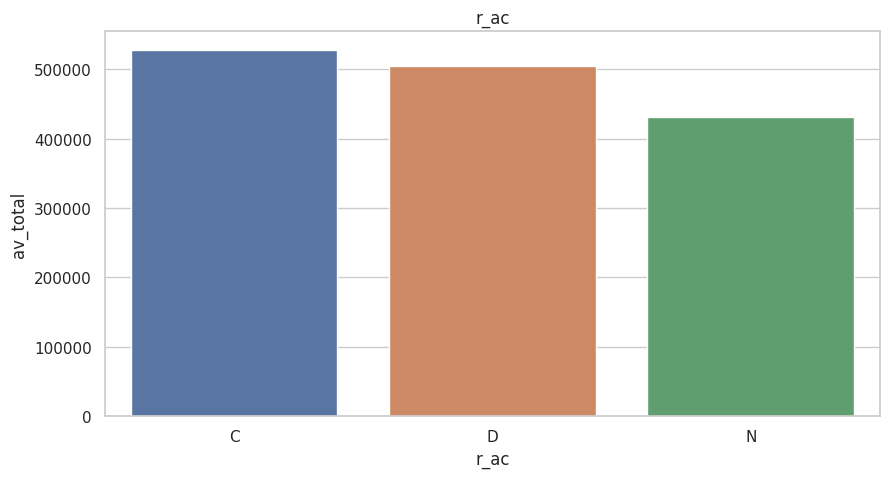

<ipython-input-15-c7f12741839a>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = boston_prep1.groupby(row).mean()


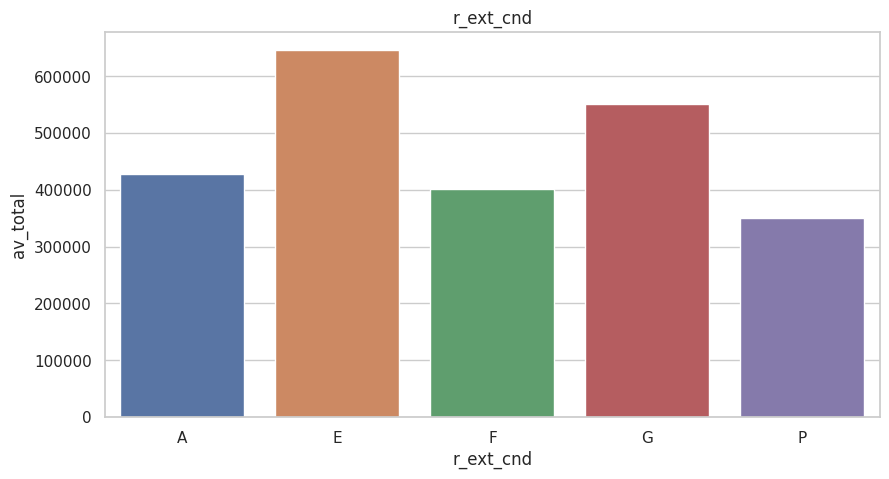

<ipython-input-15-c7f12741839a>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = boston_prep1.groupby(row).mean()


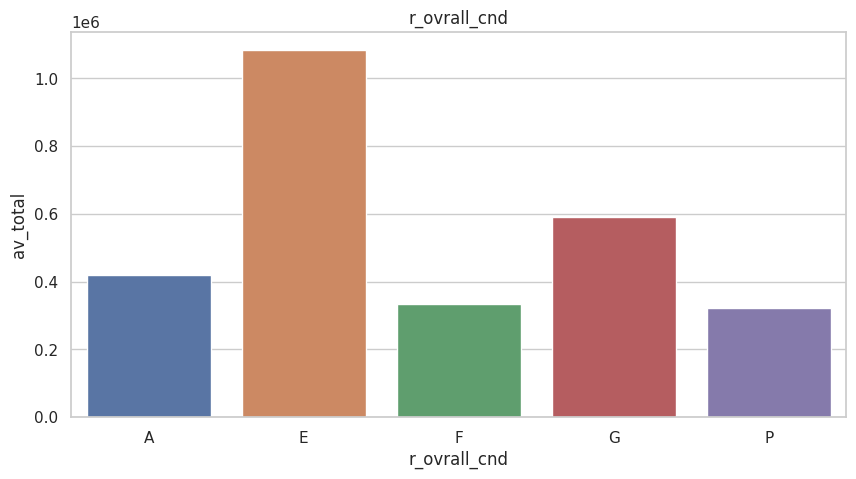

<ipython-input-15-c7f12741839a>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = boston_prep1.groupby(row).mean()


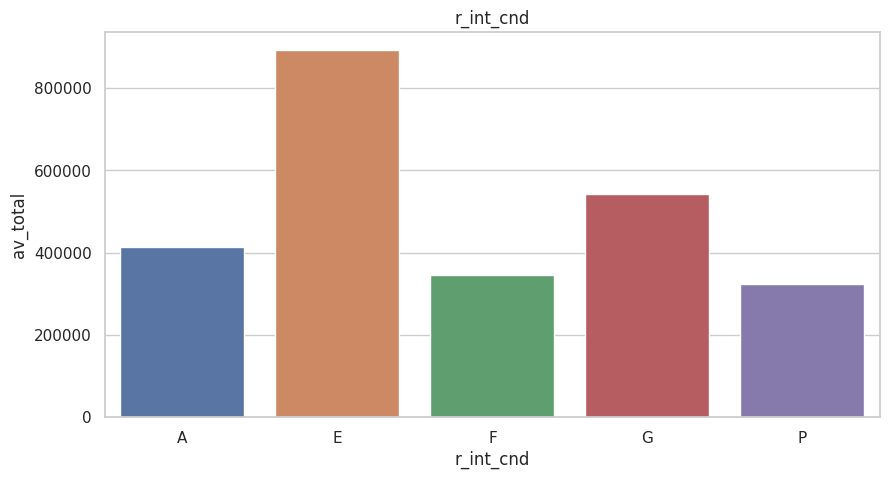

<ipython-input-15-c7f12741839a>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = boston_prep1.groupby(row).mean()


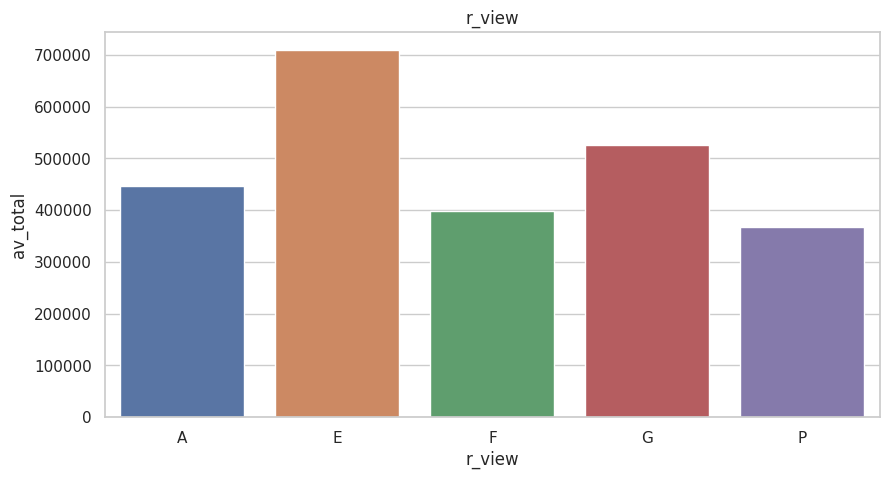

In [ ]:
# Graph
for row in  ['own_occ', 'r_ac', 'r_ext_cnd', 'r_ovrall_cnd', 'r_int_cnd', 'r_view']:
  temp = boston_prep1.groupby(row).mean()
  temp = temp.reset_index()
  plt.figure(figsize=(10,5))
  sb.barplot(data=temp, y='av_total', x=row)
  plt.title(row)
  plt.show()

<ipython-input-16-b5c280252a49>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  decades = boston_prep1.groupby('decade_built').mean()


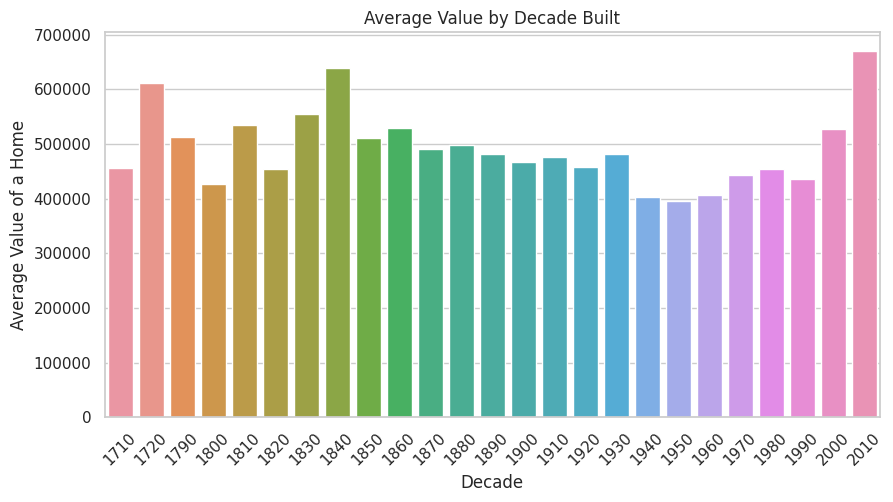

<ipython-input-16-b5c280252a49>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  decades = boston_prep1.groupby('decade_remodled').mean()


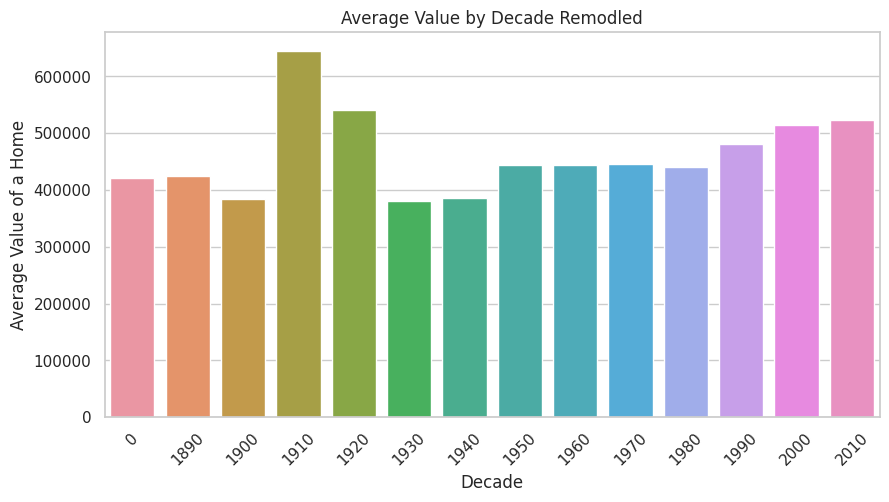

In [ ]:
# Homes Based on Decade Built
boston_prep1['decade_built'] = (boston_prep1['yr_built']/10).astype(int) * 10

decades = boston_prep1.groupby('decade_built').mean()
decades = decades.reset_index()
plt.figure(figsize=(10,5))
sb.barplot(data=decades, y='av_total', x='decade_built')
plt.xlabel('Decade')
plt.ylabel('Average Value of a Home')
plt.title('Average Value by Decade Built')
plt.xticks(rotation=45)
plt.show()

# Homes Based on Decade Remodled
boston_prep1['decade_remodled'] = (boston_prep1['yr_remod']/10).astype(int) * 10

decades = boston_prep1.groupby('decade_remodled').mean()
decades = decades.reset_index()
plt.figure(figsize=(10,5))
sb.barplot(data=decades, y='av_total', x='decade_remodled')
plt.xlabel('Decade')
plt.ylabel('Average Value of a Home')
plt.title('Average Value by Decade Remodled')
plt.xticks(rotation=45)
plt.show()

#Section 8: Model Performance


*   RSQ
*   RMSE
*   MSE
*   Which is the best model?



In [ ]:
# calculate stats
r2 = r2_score(boston_prep1['av_total'], boston_prep1['pred'])
mse = mean_squared_error(boston_prep1['av_total'], boston_prep1['pred'])
mae = mean_absolute_error(boston_prep1['av_total'], boston_prep1['pred'])

print("-- Linear Regression Stats for Model 1 -- ")
print(f'R-Square: {r2:.3f}')
print(f" - RSQUARE: approximately {r2:.1%} of the variability in the average values can be explained by our model.")

print(f'Root Mean Squared Error: {mse**0.5:,.2f}')
print(f" - RMSE: on average, our predictions are approximately ${mse**0.5:,.2f} away from the actual average value")
print(f'Mean Absolute Error: {mae:,.2f}')
print(f" - MAE:  on average, the predictions made by the model are off by +/- ${mae:,.2f} from the actual\n\n")

# calculate stats
r2 = r2_score(boston_prep2['av_total'], boston_prep2['pred'])
mse = mean_squared_error(boston_prep2['av_total'], boston_prep2['pred'])
mae = mean_absolute_error(boston_prep2['av_total'], boston_prep2['pred'])

print("-- Linear Regression Stats Model 2 -- ")
print(f'R-Square: {r2:.3f}')
print(f" - RSQUARE: approximately {r2:.1%} of the variability in the average values can be explained by our model.")

print(f'Root Mean Squared Error: {mse**0.5:,.2f}')
print(f" - RMSE: on average, our predictions are approximately ${mse**0.5:,.2f} away from the actual average value")
print(f'Mean Absolute Error: {mae:,.2f}')
print(f" - MAE:  on average, the predictions made by the model are off by +/- ${mae:,.2f} from the actual")

-- Linear Regression Stats for Model 1 -- 
R-Square: 0.439
 - RSQUARE: approximately 43.9% of the variability in the average values can be explained by our model.
Root Mean Squared Error: 107,810.50
 - RMSE: on average, our predictions are approximately $107,810.50 away from the actual average value
Mean Absolute Error: 77,494.68
 - MAE:  on average, the predictions made by the model are off by +/- $77,494.68 from the actual


-- Linear Regression Stats Model 2 -- 
R-Square: 0.948
 - RSQUARE: approximately 94.8% of the variability in the average values can be explained by our model.
Root Mean Squared Error: 32,894.53
 - RMSE: on average, our predictions are approximately $32,894.53 away from the actual average value
Mean Absolute Error: 23,476.36
 - MAE:  on average, the predictions made by the model are off by +/- $23,476.36 from the actual


#Top and Bottom 10 record predictions

*   Best Predicitons of AV_TOTAL
*   Overestimates of AV_TOTAL
*   Underestimates of AV_TOTAL

In [ ]:
#Best Predictions
boston_prep2['abs_residual'] = boston_prep2['residual_error'].abs().round(3)
print(boston_prep2[['pid','av_total','pred','abs_residual']].nsmallest(10,'abs_residual'))

#Over Estimates
print(boston_prep2[['pid','av_total','pred','residual_error']].nlargest(10,'residual_error'))

#Under Estimates
print(boston_prep2[['pid','av_total','pred','residual_error']].nsmallest(10,'residual_error'))

          pid     av_total          pred  abs_residual
13146  131520  332042.1316  332043.65625         1.525
2131    21340  359000.0000  359010.53125        10.531
47        480  344800.0000  344813.37500        13.375
2050    20530  285886.7055  285902.59375        15.888
3848    38520  658200.0000  658181.50000        18.500
8448    84520  454388.7767  454407.90625        19.130
11636  116420  451563.1848  451585.12500        21.940
11522  115280  314484.7140  314506.96875        22.255
12647  126530  553200.0000  553175.87500        24.125
9486    94900  382567.6008  382593.09375        25.493
          pid   av_total         pred  residual_error
11269  112750   767500.0  542955.3125     224544.6875
652      6530   732300.0  519895.8750     212404.1250
7848    78520  1011700.0  826599.8750     185100.1250
5176    51800   944600.0  760980.6875     183619.3125
6047    60510  1062620.0  883951.8125     178668.1875
3755    37590   809300.0  642110.1875     167189.8125
1581    15830   7

In [ ]:
%%shell
jupyter nbconvert --to html /content/Linear_Regression_and_Predictive_Modeling_Harve_Criqui.ipynb

[NbConvertApp] Converting notebook /content/Linear_Regression_and_Predictive_Modeling_Harve_Criqui.ipynb to html
[NbConvertApp] Writing 2612595 bytes to /content/Linear_Regression_and_Predictive_Modeling_Harve_Criqui.html
